In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import mglearn

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=66)

In [6]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [7]:
tree.score(X_train, y_train)

1.0

In [8]:
tree.score(X_test, y_test)

0.8951048951048951

In [9]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
tree.score(X_train, y_train)

0.9882629107981221

In [11]:
tree.score(X_test, y_test)

0.9020979020979021

In [15]:
export_graphviz(tree, out_file="tree.dot",
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                impurity=False,filled=True)

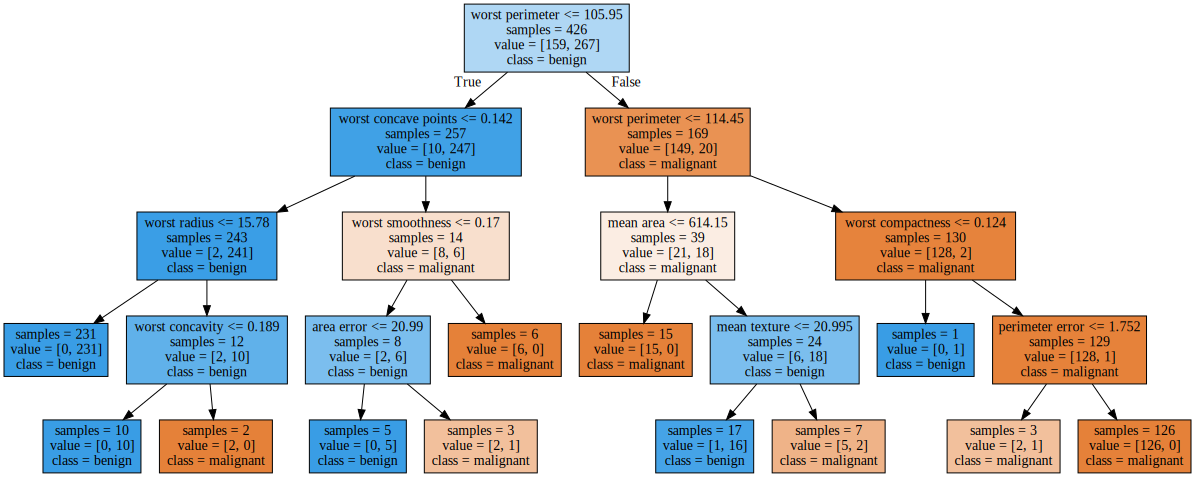

In [17]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
tree.feature_importances_

array([0.        , 0.02220126, 0.        , 0.05411368, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00339317, 0.00868491, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00330241, 0.        , 0.81689407, 0.        , 0.02009937,
       0.01018201, 0.01736982, 0.04375929, 0.        , 0.        ])

In [28]:
def plot_importance_graph(model):
    
    features = cancer.data.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(features), model.feature_importances_, align='center')
    plt.yticks(np.arange(features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

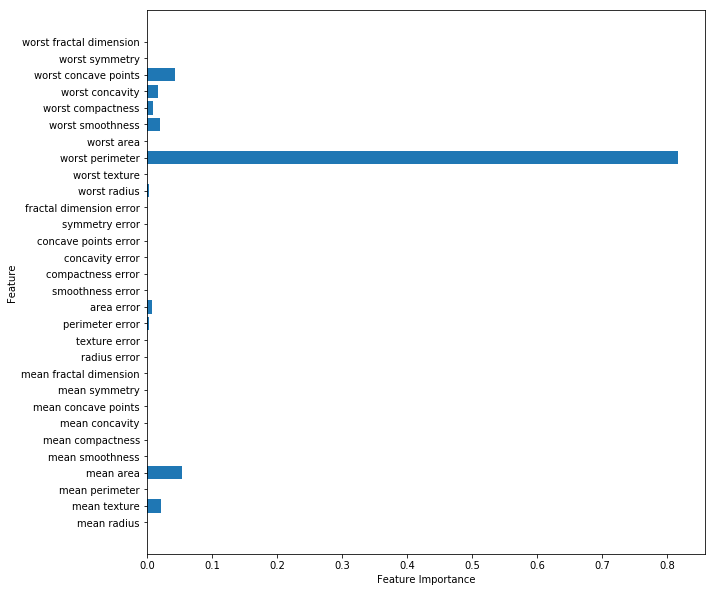

In [29]:
plot_importance_graph(tree)

Feature importances: [0. 1.]


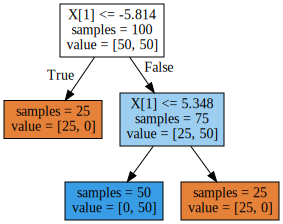

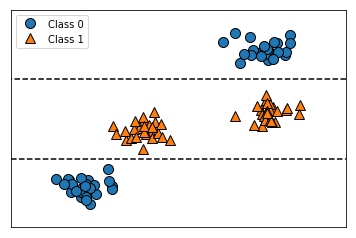

In [32]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)